# Species Identification

In [1]:
import os

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

## Dataset

### Preprocessing

In [2]:
json_file_path = '/home/deepb/Desktop/AIDS/project task 1/dataset/train_2017_bboxes.json'

In [3]:
import json

with open(json_file_path, 'r') as f:
    annotations_data = json.load(f)

In [4]:
print(annotations_data.keys())

dict_keys(['images', 'licenses', 'info', 'annotations', 'categories'])


In [5]:
print(annotations_data['categories'])

[{'supercategory': 'Insecta', 'id': 1916, 'name': 'Nicrophorus tomentosus'}, {'supercategory': 'Insecta', 'id': 3808, 'name': 'Halyomorpha halys'}, {'supercategory': 'Plantae', 'id': 3516, 'name': 'Betula lenta'}, {'supercategory': 'Fungi', 'id': 2533, 'name': 'Hericium erinaceus'}, {'supercategory': 'Animalia', 'id': 4854, 'name': 'Harpaphe haydeniana'}, {'supercategory': 'Insecta', 'id': 1852, 'name': 'Euptoieta hegesia'}, {'supercategory': 'Fungi', 'id': 237, 'name': 'Hericium coralloides'}, {'supercategory': 'Plantae', 'id': 2419, 'name': 'Frangula caroliniana'}, {'supercategory': 'Plantae', 'id': 3527, 'name': 'Amorpha fruticosa'}, {'supercategory': 'Amphibia', 'id': 2692, 'name': 'Hyla eximia'}, {'supercategory': 'Insecta', 'id': 1784, 'name': 'Nannothemis bella'}, {'supercategory': 'Plantae', 'id': 1047, 'name': 'Penstemon digitalis'}, {'supercategory': 'Plantae', 'id': 3913, 'name': 'Cornus canadensis'}, {'supercategory': 'Plantae', 'id': 3725, 'name': 'Metrosideros excelsa'}, 

In [6]:
print(annotations_data['annotations'][0])
print(annotations_data['images'][0])

{'area': 41823.5, 'iscrowd': 0, 'image_id': 1, 'bbox': [184, 139, 359, 233], 'category_id': 0, 'id': 1}
{'license': '3', 'file_name': 'train_val_images/Mammalia/Marmota flaviventris/6e95e4ae165c3bd2b74490d0d655cc2d.jpg', 'rights_holder': 'R.J. Adams', 'height': 532, 'width': 800, 'id': 1}


In [7]:
print(annotations_data['annotations'][1])
print(annotations_data['images'][1])

{'area': 54032.0, 'iscrowd': 0, 'image_id': 2, 'bbox': [214, 109, 352, 307], 'category_id': 0, 'id': 2}
{'license': '3', 'file_name': 'train_val_images/Mammalia/Marmota flaviventris/dccb515afafdb1367bad7f44f79e53a7.jpg', 'rights_holder': 'R.J. Adams', 'height': 533, 'width': 800, 'id': 2}


In [8]:
category_0_annotations = [annotation for annotation in annotations_data['annotations'] if annotation['category_id'] == 0]
print(len(category_0_annotations))

192


In [9]:
mammalia_images = [image for image in annotations_data['images'] if '/Mammalia/' in image['file_name']]
print(len(mammalia_images))

24412


In [10]:
unique_image_ids = len(set(image['id'] for image in annotations_data['images']))
unique_annotation_ids = len(set(annotation['image_id'] for annotation in annotations_data['annotations']))

print(f"Unique image IDs: {unique_image_ids}")
print(f"Unique annotation IDs: {unique_annotation_ids}")
print(f"Number of images: {len(annotations_data['images'])}")
print(f"Number of annotations: {len(annotations_data['annotations'])}")  

Unique image IDs: 395583
Unique annotation IDs: 395583
Number of images: 395583
Number of annotations: 496164


In [11]:
from collections import Counter

# Count the occurrences of each image_id in the annotations
image_id_counts = Counter(annotation['image_id'] for annotation in annotations_data['annotations'])

# Filter the image_ids that have more than one annotation
duplicate_image_ids = [image_id for image_id, count in image_id_counts.items() if count > 1]

# Print the number of such image_ids
print(f"Number of annotations with more than one same 'image_id': {len(duplicate_image_ids)}")

# print the number of annotations with duplicate image_ids
print(f"Number of annotations with duplicate image_ids: {sum(image_id_counts[image_id] for image_id in duplicate_image_ids)}")

Number of annotations with more than one same 'image_id': 48537
Number of annotations with duplicate image_ids: 149118


In [12]:
mammalia_image_ids = {image['id'] for image in annotations_data['images'] if image['file_name'].startswith('train_val_images/Mammalia/')}
mammalia_annotations = [annotation for annotation in annotations_data['annotations'] if annotation['image_id'] in mammalia_image_ids]
print(len(mammalia_annotations))
print(len(mammalia_image_ids))

31109
24412


In [13]:
# Filter the images to include only those that are mammals
filtered_images = [image for image in annotations_data['images'] if image['id'] in mammalia_image_ids]

# Filter the annotations to include only those that are mammals
filtered_annotations = mammalia_annotations

# Filter the categories to include only those that are mammals
mammal_category_ids = {annotation['category_id'] for annotation in mammalia_annotations}
filtered_categories = [category for category in annotations_data['categories'] if category['id'] in mammal_category_ids]

# Create the filtered annotations_data dictionary
filtered_annotations_data = {
    'images': filtered_images,
    'annotations': filtered_annotations,
    'categories': filtered_categories
}

print(f"Filtered images: {len(filtered_images)}")
print(f"Filtered annotations: {len(filtered_annotations)}")
print(f"Filtered categories: {len(filtered_categories)}")

unique_filtered_image_ids = set(annotation['image_id'] for annotation in filtered_annotations)
print(f"Unique image IDs in filtered annotations: {len(unique_filtered_image_ids)}")

Filtered images: 24412
Filtered annotations: 31109
Filtered categories: 186
Unique image IDs in filtered annotations: 24412


In [14]:
print(filtered_annotations_data.keys())
print(filtered_annotations_data['categories'])
print(filtered_annotations_data['annotations'][0])
print(filtered_annotations_data['images'][0])

dict_keys(['images', 'annotations', 'categories'])
[{'supercategory': 'Mammalia', 'id': 4404, 'name': 'Ceratotherium simum simum'}, {'supercategory': 'Mammalia', 'id': 5034, 'name': 'Desmodus rotundus'}, {'supercategory': 'Mammalia', 'id': 375, 'name': 'Papio ursinus'}, {'supercategory': 'Mammalia', 'id': 3214, 'name': 'Equus caballus'}, {'supercategory': 'Mammalia', 'id': 2867, 'name': 'Alces americanus'}, {'supercategory': 'Mammalia', 'id': 3980, 'name': 'Tadarida brasiliensis'}, {'supercategory': 'Mammalia', 'id': 1064, 'name': 'Lavia frons'}, {'supercategory': 'Mammalia', 'id': 4746, 'name': 'Trichechus manatus latirostris'}, {'supercategory': 'Mammalia', 'id': 2445, 'name': 'Phocoena phocoena'}, {'supercategory': 'Mammalia', 'id': 73, 'name': 'Eschrichtius robustus'}, {'supercategory': 'Mammalia', 'id': 4071, 'name': 'Tursiops truncatus'}, {'supercategory': 'Mammalia', 'id': 2971, 'name': 'Orcinus orca'}, {'supercategory': 'Mammalia', 'id': 1567, 'name': 'Delphinus delphis'}, {'su

In [15]:
unique_supercategories = set(category['supercategory'] for category in filtered_annotations_data['categories'])
print(unique_supercategories)

{'Mammalia'}


In [16]:
# Define the validation dataset JSON file path
val_json_file_path = '/home/deepb/Desktop/AIDS/project task 1/dataset/val_2017_bboxes.json'

# Load the validation dataset JSON file
with open(val_json_file_path, 'r') as f:
    val_annotations_data = json.load(f)

# Filter the images to include only those that are mammals
val_mammalia_image_ids = {image['id'] for image in val_annotations_data['images'] if '/Mammalia/' in image['file_name']}
val_mammalia_annotations = [annotation for annotation in val_annotations_data['annotations'] if annotation['image_id'] in val_mammalia_image_ids]

# Filter the images to include only those that are mammals
val_filtered_images = [image for image in val_annotations_data['images'] if image['id'] in val_mammalia_image_ids]

# Filter the categories to include only those that are mammals
val_mammal_category_ids = {annotation['category_id'] for annotation in val_mammalia_annotations}
val_filtered_categories = [category for category in val_annotations_data['categories'] if category['id'] in val_mammal_category_ids]

# Create the filtered annotations_data dictionary for validation dataset
val_filtered_annotations_data = {
    'images': val_filtered_images,
    'annotations': val_mammalia_annotations,
    'categories': val_filtered_categories
}

print(f"Filtered validation images: {len(val_filtered_images)}")
print(f"Filtered validation annotations: {len(val_mammalia_annotations)}")
print(f"Filtered validation categories: {len(val_filtered_categories)}")

Filtered validation images: 2654
Filtered validation annotations: 2654
Filtered validation categories: 186


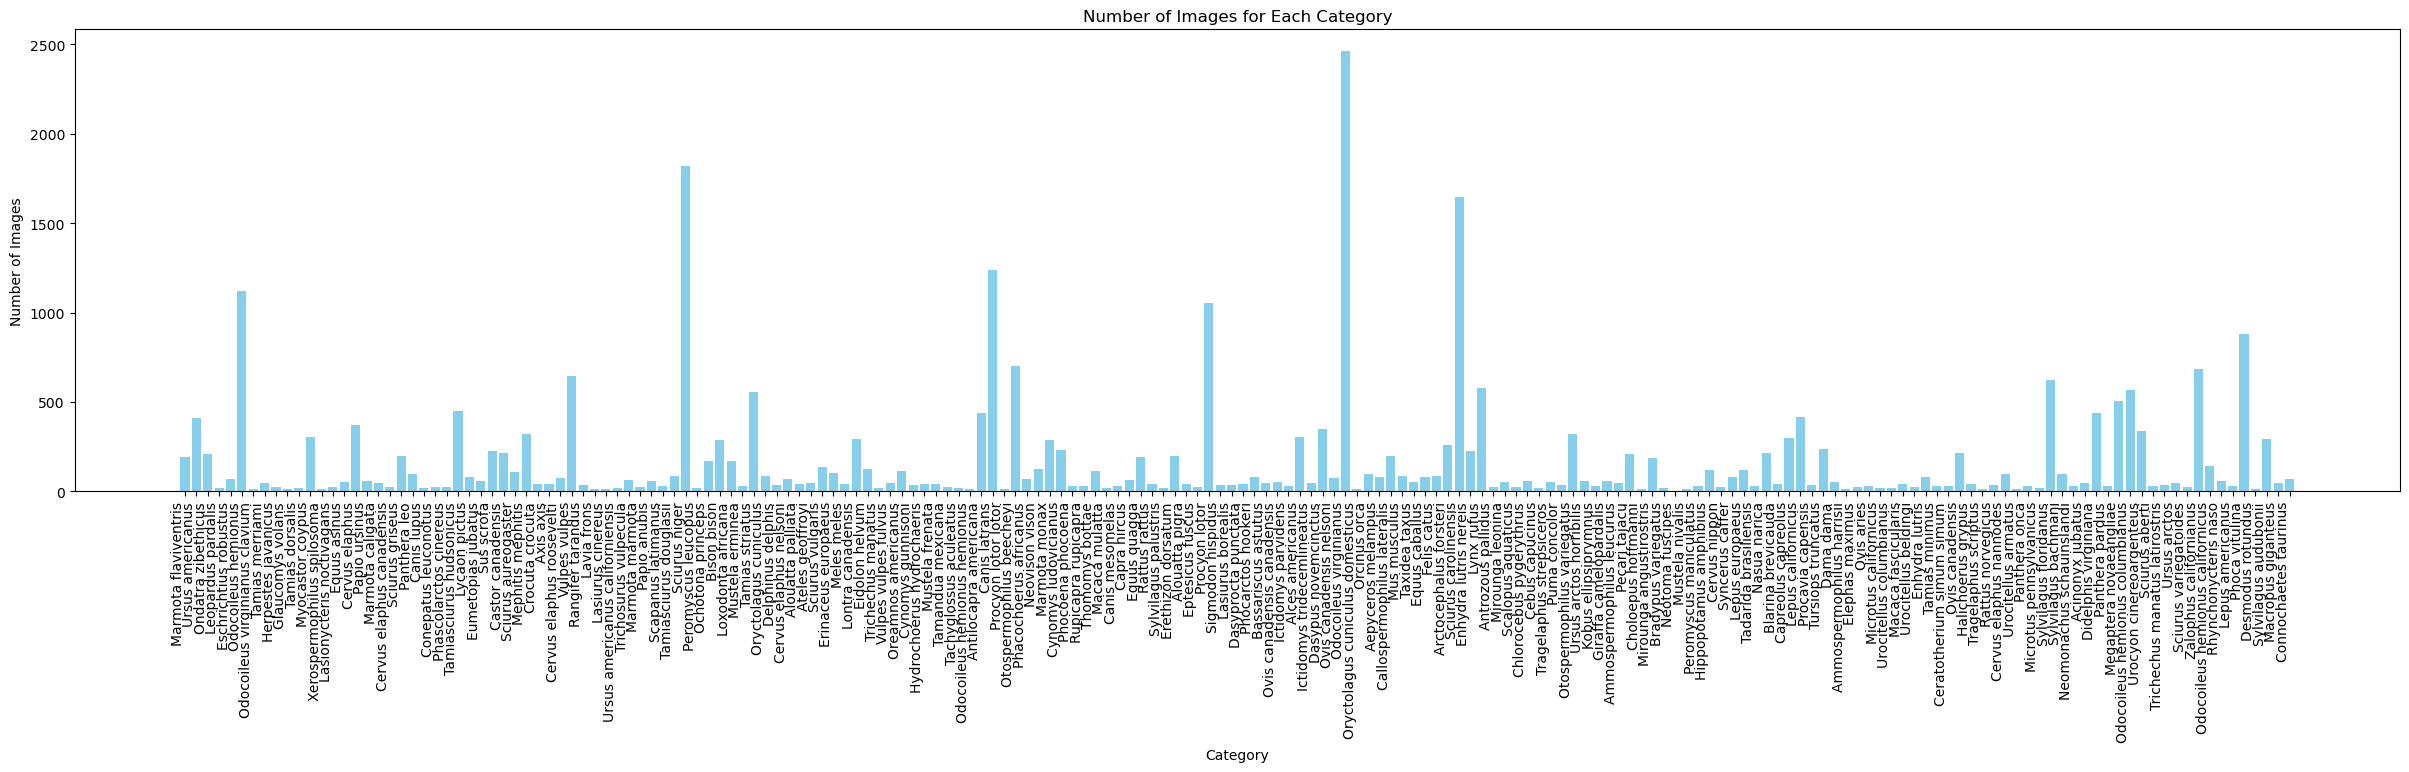

In [21]:
from collections import Counter

import matplotlib.pyplot as plt

# Count the number of images for each category
category_image_count = Counter()
for annotation in filtered_annotations_data['annotations']:
    category_id = annotation['category_id']
    category_image_count[category_id] += 1

# Get category names
category_names = {category['id']: category['name'] for category in filtered_annotations_data['categories']}

# Prepare data for plotting
categories = [category_names[category_id] for category_id in category_image_count.keys()]
counts = list(category_image_count.values())

# Plot the data
plt.figure(figsize=(30, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Category')
plt.xticks(rotation=90, ha='right')
plt.show()

In [19]:
# Filter categories with count more than 500
categories_more_than_500 = {category_id: count for category_id, count in category_image_count.items() if count > 500}

# Get the names of these categories
categories_more_than_500_names = {category_id: category_names[category_id] for category_id in categories_more_than_500.keys()}

print(categories_more_than_500_names)
print(len(categories_more_than_500_names))

{99: 'Odocoileus hemionus', 985: 'Vulpes vulpes', 1258: 'Sciurus niger', 1505: 'Tamias striatus', 2269: 'Canis latrans', 2326: 'Otospermophilus beecheyi', 2757: 'Procyon lotor', 2929: 'Odocoileus virginianus', 3389: 'Sciurus carolinensis', 3406: 'Lynx rufus', 4492: 'Sylvilagus floridanus', 4606: 'Megaptera novaeangliae', 4614: 'Odocoileus hemionus columbianus', 4985: 'Zalophus californianus', 5019: 'Phoca vitulina'}
15


### Dataset class

In [17]:
# Create a dictionary with category id as key and label as value
category_id_to_label = {category['id']: idx for idx, category in enumerate(sorted(filtered_annotations_data['categories'], key=lambda x: x['id']))}

print(category_id_to_label)

{0: 0, 6: 1, 8: 2, 57: 3, 73: 4, 99: 5, 141: 6, 197: 7, 200: 8, 226: 9, 230: 10, 242: 11, 271: 12, 292: 13, 364: 14, 366: 15, 375: 16, 387: 17, 390: 18, 398: 19, 429: 20, 481: 21, 576: 22, 635: 23, 642: 24, 792: 25, 849: 26, 862: 27, 864: 28, 867: 29, 889: 30, 936: 31, 943: 32, 984: 33, 985: 34, 1011: 35, 1064: 36, 1078: 37, 1128: 38, 1160: 39, 1205: 40, 1221: 41, 1239: 42, 1250: 43, 1258: 44, 1263: 45, 1264: 46, 1270: 47, 1414: 48, 1424: 49, 1505: 50, 1523: 51, 1567: 52, 1582: 53, 1637: 54, 1646: 55, 1687: 56, 1706: 57, 1746: 58, 1839: 59, 1863: 60, 1865: 61, 1891: 62, 1934: 63, 1936: 64, 1939: 65, 1986: 66, 2033: 67, 2102: 68, 2212: 69, 2239: 70, 2269: 71, 2296: 72, 2326: 73, 2342: 74, 2368: 75, 2380: 76, 2434: 77, 2445: 78, 2481: 79, 2557: 80, 2566: 81, 2570: 82, 2578: 83, 2608: 84, 2629: 85, 2648: 86, 2649: 87, 2687: 88, 2725: 89, 2757: 90, 2761: 91, 2765: 92, 2773: 93, 2842: 94, 2852: 95, 2860: 96, 2865: 97, 2867: 98, 2902: 99, 2908: 100, 2922: 101, 2929: 102, 2962: 103, 2971: 104

In [18]:
import os
import cv2
import numpy as np

class YOLODataset:
    def __init__(self, annotations_data, images_dir):
        self.annotations_data = annotations_data
        self.images_dir = images_dir
        self.image_id_to_annotations = self._create_image_id_to_annotations()

    def _create_image_id_to_annotations(self):
        image_id_to_annotations = {}
        for annotation in self.annotations_data['annotations']:
            image_id = annotation['image_id']
            if image_id not in image_id_to_annotations:
                image_id_to_annotations[image_id] = []
            image_id_to_annotations[image_id].append(annotation)
        return image_id_to_annotations

    def _convert_bbox_to_yolo(self, bbox, img_width, img_height):
        x_min, y_min, width, height = bbox
        x_center = (x_min + width / 2) / img_width
        y_center = (y_min + height / 2) / img_height
        width /= img_width
        height /= img_height
        return [x_center, y_center, width, height]

    def __len__(self):
        return len(self.annotations_data['images'])

    def __getitem__(self, idx):
        image_info = self.annotations_data['images'][idx]
        image_id = image_info['id']
        image_path = os.path.join(self.images_dir, image_info['file_name'])
        image = cv2.imread(image_path)
        img_height, img_width = image.shape[:2]

        annotations = self.image_id_to_annotations.get(image_id, [])
        bboxes = []
        labels = []
        for annotation in annotations:
            bbox = annotation['bbox']
            category_id = annotation['category_id']
            yolo_bbox = self._convert_bbox_to_yolo(bbox, img_width, img_height)
            bboxes.append(yolo_bbox)
            label = category_id_to_label[category_id]
            labels.append(label)

        return image, labels, bboxes

# Example usage
images_dir = '/home/deepb/Desktop/AIDS/project task 1/code'
dataset = YOLODataset(filtered_annotations_data, images_dir)

# Get the first item in the dataset
image, labels, bboxes = dataset[0]
print("Image shape:", image.shape)
print("Labels:", labels)
print("Bounding boxes (YOLO format):", bboxes)

Image shape: (532, 800, 3)
Labels: [0]
Bounding boxes (YOLO format): [[0.454375, 0.48026315789473684, 0.44875, 0.43796992481203006]]


In [19]:
# import os
# import shutil

# # Extract the paths to the train and validation images from the filtered annotations data
# train_image_paths = [image['file_name'] for image in filtered_annotations_data['images']]
# val_image_paths = [image['file_name'] for image in val_filtered_annotations_data['images']]

# # Define the directories for training and validation images
# train_images_dir = 'train_images/images'
# val_images_dir = 'val_images/images'

# # Create the directories if they do not exist
# os.makedirs(train_images_dir, exist_ok=True)
# os.makedirs(val_images_dir, exist_ok=True)

# # Copy the training images to the train_images directory
# for image_path in train_image_paths:
#     src_path = os.path.join(images_dir, image_path)
#     dst_path = os.path.join(train_images_dir, os.path.basename(image_path))
#     shutil.copy(src_path, dst_path)

# # Copy the validation images to the val_images directory
# for image_path in val_image_paths:
#     src_path = os.path.join(images_dir, image_path)
#     dst_path = os.path.join(val_images_dir, os.path.basename(image_path))
#     shutil.copy(src_path, dst_path)

# print(f"Training images saved to {train_images_dir}")
# print(f"Validation images saved to {val_images_dir}")

In [20]:
# # Define the directories for training and validation labels
# train_labels_dir = 'train/labels'
# val_labels_dir = 'val/labels'

# # Create the directories if they do not exist
# os.makedirs(train_labels_dir, exist_ok=True)
# os.makedirs(val_labels_dir, exist_ok=True)

# def save_labels_and_bboxes(dataset, labels_dir):
#     for idx in range(len(dataset)):
#         image, labels, bboxes = dataset[idx]
#         image_info = dataset.annotations_data['images'][idx]
#         image_file_name = os.path.splitext(image_info['file_name'])[0]  # Get the file name without extension
#         l = image_file_name.split('/')
#         image_file_name = l[-1]
#         label_file_path = os.path.join(labels_dir, f"{image_file_name}.txt")
        
#         with open(label_file_path, 'w') as f:
#             for label, bbox in zip(labels, bboxes):
#                 bbox_str = ' '.join(map(str, bbox))
#                 f.write(f"{label} {bbox_str}\n")

# # Save labels and bounding boxes for training set
# save_labels_and_bboxes(dataset, train_labels_dir)

# # Create a YOLODataset instance for the validation set
# val_dataset = YOLODataset(val_filtered_annotations_data, images_dir)

# # Save labels and bounding boxes for validation set
# save_labels_and_bboxes(val_dataset, val_labels_dir)

# print(f"Training labels saved to {train_labels_dir}")
# print(f"Validation labels saved to {val_labels_dir}")

## Model

In [20]:
from ultralytics import YOLO

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View Ultralytics Settings with 'yolo settings' or at '/home/deepb/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [21]:
from ultralytics import settings
settings['datasets'] = '/home/deepb/Desktop/AIDS/project task 1/code'

In [3]:
model = YOLO('yolov8n.pt')

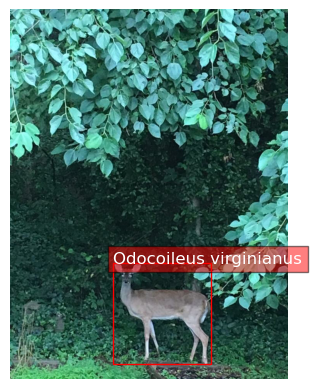

In [24]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Select a random image from the dataset
random_idx = random.randint(0, len(dataset) - 1)
image, labels, bboxes = dataset[random_idx]

def get_key(val):
    for key, value in category_id_to_label.items():
        if val == value:
            return key
    return "key doesn't exist"

labels = [get_key(label) for label in labels]

# Plot the image
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot the bounding boxes and label names
for bbox, label in zip(bboxes, labels):
    x_center, y_center, width, height = bbox
    img_height, img_width = image.shape[:2]
    x_min = (x_center - width / 2) * img_width
    y_min = (y_center - height / 2) * img_height
    rect = patches.Rectangle((x_min, y_min), width * img_width, height * img_height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    # Get the label name from the filtered categories
    label_name = next(category['name'] for category in filtered_annotations_data['categories'] if category['id'] == label)
    
    # Add the label name to the bounding box
    ax.text(x_min, y_min, label_name, fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')
plt.show()

In [25]:
import yaml

# Define the path to save the YAML file
yaml_file_path = 'annotations_data.yaml'

train_path = '/home/deepb/Desktop/AIDS/project task 1/code/train/images'
val_path = '/home/deepb/Desktop/AIDS/project task 1/code/val/images'

# Create a dictionary in the format required by YOLO
yolo_annotations_data = {
    'path': images_dir,
    'train': train_path,
    'val': val_path,
    'nc': len(filtered_annotations_data['categories']),
    'names': [category['name'] for category in filtered_annotations_data['categories']]
}

# Save the dictionary to a YAML file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(yolo_annotations_data, yaml_file, default_flow_style=False)

print(f"Annotations data saved to {yaml_file_path}")

Annotations data saved to annotations_data.yaml


In [ ]:
epochs = 10
batch_size = 1

# Train the model using the YAML file
model.train(data=yaml_file_path, epochs=epochs, batch=batch_size, imgsz=256)

Ultralytics 8.3.28 🚀 Python-3.12.4 torch-2.4.1 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 5937MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=annotations_data.yaml, epochs=10, time=None, patience=100, batch=1, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

RuntimeError: CUDA error: out of memory
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [22]:
model = YOLO('best.pt')

In [ ]:
image_path = '/home/deepb/Desktop/AIDS/project task 1/code/download.jpeg'

# do inference on this image
results = model(source=image_path, show=True)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread (0x9ef8c60).
Cannot move to target thread (0xac8f950)

QObject::moveToThread: Current thread (0xac8f950) is not the object's thread

image 1/1 /home/deepb/Desktop/AIDS/project task 1/code/download.jpeg: 192x256 1 Ursus arctos horribilis, 23.8ms
Speed: 0.4ms preprocess, 23.8ms inference, 44.2ms postprocess per image at shape (1, 3, 192, 256)


: 